In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv', sep = ',')
fashion_test_df = pd.read_csv(r'fashion-mnist_test.csv', sep = ',')

In [26]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [27]:
print(fashion_test_df.shape)
print(fashion_train_df.shape)

(10000, 785)
(60000, 785)


In [0]:
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype = 'float32')

8.0

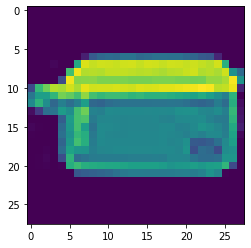

In [29]:
# to display image in random
import random
i = random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape(28, 28))
label = training[i, 0]
label

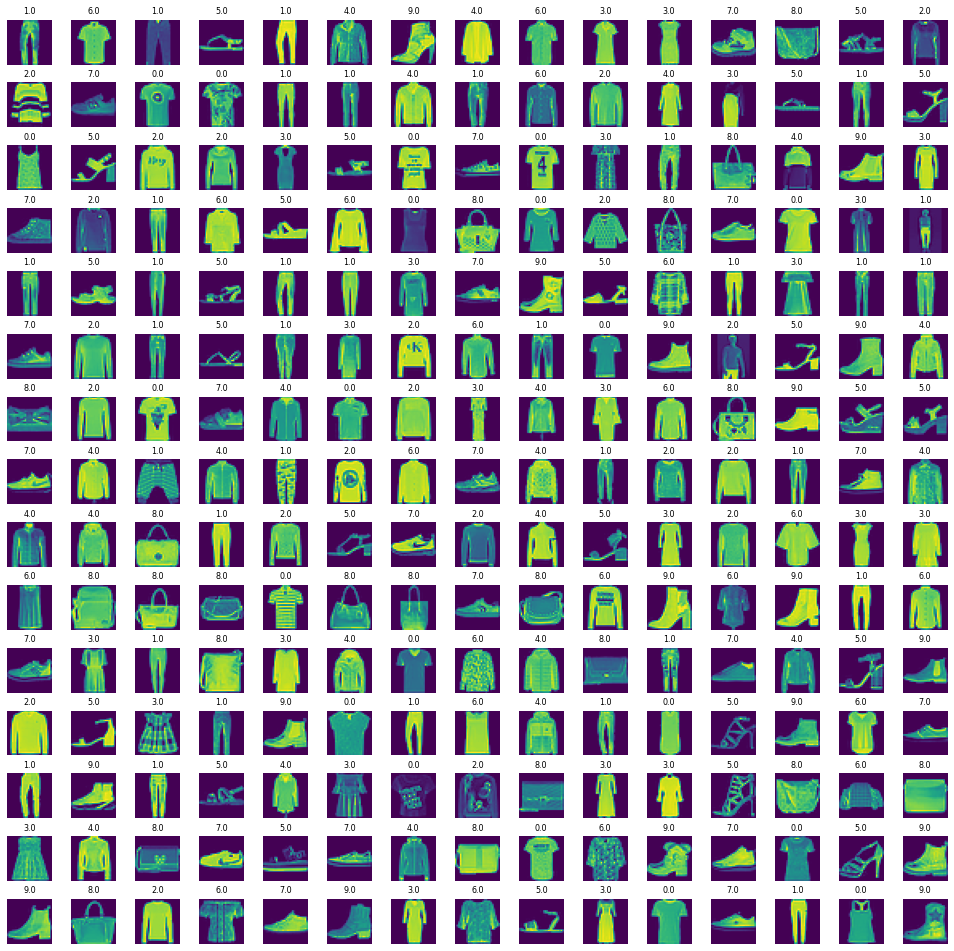

In [30]:
# To view more images in a grid format
#Define the dimensions of the plot grid
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17)) #figure size
axes = axes.ravel() #flatten teh 15 x 15 matrix into 225 array
n_training = len(training)

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid):  #Create evenly spaced variables
    index = np.random.randint(0, n_training)
    axes[i].imshow(training[index, 1:].reshape(28,28))
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

### Model Training

In [0]:
X_train = training[:,1:]/255
y_train = training[:,0]
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [0]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [34]:
X_train.shape

(48000, 28, 28, 1)

In [35]:
X_validate.shape

(12000, 28, 28, 1)

In [36]:
X_test.shape

(10000, 28, 28, 1)

In [37]:
import keras

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [0]:
cnn_model = Sequential()

In [0]:
#conv layer
cnn_model.add(Conv2D(32,(3,3), input_shape = (28,28,1), activation = 'relu'))

In [0]:
#maxpooling layer
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
#flattening the neural layer
cnn_model.add(Flatten())

In [0]:
cnn_model.add(Dense(activation = 'relu', units = 32))

In [0]:
cnn_model.add(Dense(units = 10, activation = 'sigmoid'))

In [0]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer = Adam(learning_rate=0.001), metrics = ['accuracy'])

In [0]:
epochs = 50

In [51]:
cnn_model.fit(X_train,
              y_train,
              batch_size = 512,
              epochs = epochs,
              verbose = 1,
              validation_data = (X_validate, y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 75s 2ms/step - loss: 1.1142 - accuracy: 0.4792 - val_loss: 0.5637 - val_accuracy: 0.7978
Epoch 2/50
48000/48000 [==============================] - 75s 2ms/step - loss: 0.4840 - accuracy: 0.8267 - val_loss: 0.4429 - val_accuracy: 0.8457
Epoch 3/50
48000/48000 [==============================] - 76s 2ms/step - loss: 0.4167 - accuracy: 0.8513 - val_loss: 0.3820 - val_accuracy: 0.8662
Epoch 4/50
48000/48000 [==============================] - 74s 2ms/step - loss: 0.3715 - accuracy: 0.8691 - val_loss: 0.3552 - val_accuracy: 0.8748
Epoch 5/50
48000/48000 [==============================] - 73s 2ms/step - loss: 0.3503 - accuracy: 0.8765 - val_loss: 0.3327 - val_accuracy: 0.8859
Epoch 6/50
48000/48000 [==============================] - 73s 2ms/step - loss: 0.3273 - accuracy: 0.8838 - val_loss: 0.3436 - val_accuracy: 0.8825
Epoch 7/50
48000/48000 [==============================] - 73s 2ms/st

### Evaluating the model

In [53]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 4s 424us/step
Test Accuracy: 0.911


In [54]:
pred_classes = cnn_model.predict_classes(X_test)
pred_classes

array([0, 1, 2, ..., 8, 8, 1])

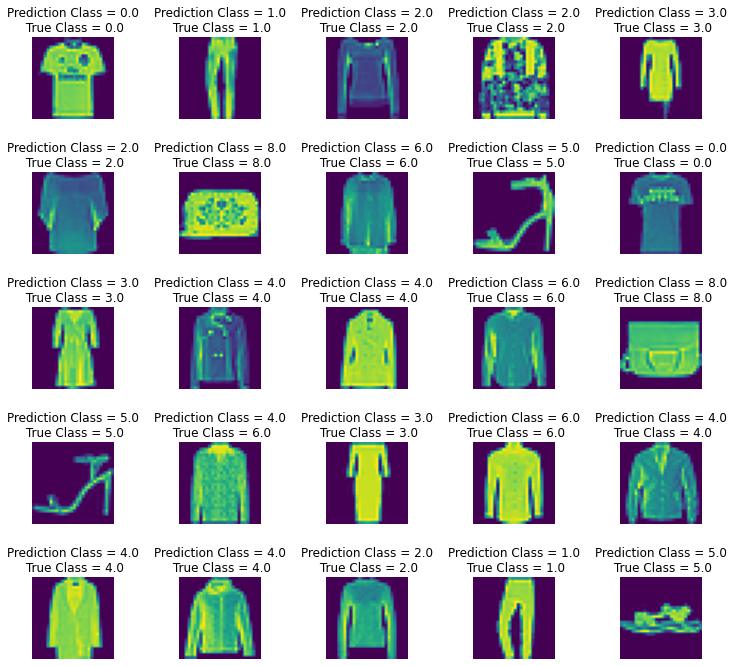

In [64]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
  axes[i].imshow(X_test[i].reshape(28,28))
  axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(pred_classes[i], y_test[i]))
  axes[i].axis('off')

plt.subplots_adjust(wspace = 0.8)

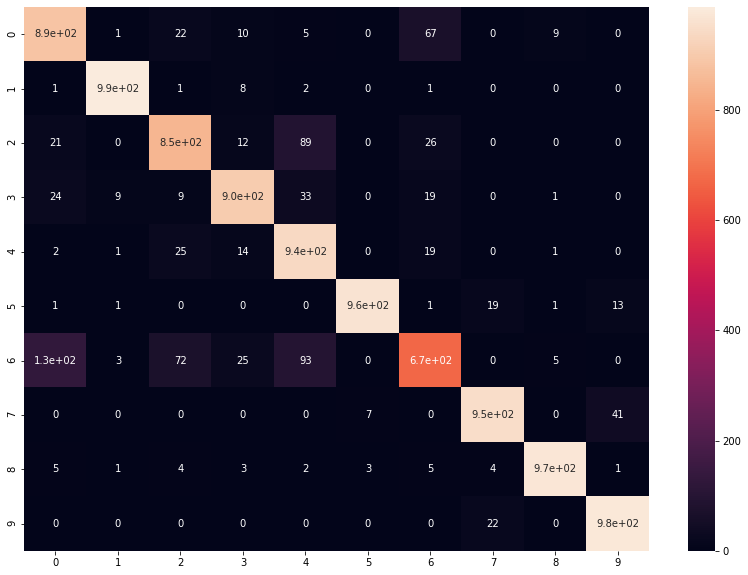

In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot = True)

In [67]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, pred_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.83      0.89      0.86      1000
     Class 1       0.98      0.99      0.99      1000
     Class 2       0.86      0.85      0.86      1000
     Class 3       0.93      0.91      0.92      1000
     Class 4       0.81      0.94      0.87      1000
     Class 5       0.99      0.96      0.98      1000
     Class 6       0.83      0.67      0.74      1000
     Class 7       0.95      0.95      0.95      1000
     Class 8       0.98      0.97      0.98      1000
     Class 9       0.95      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



The 10 classes are:  
0 => T - shirt/Top  
1 => Trouser  
2 => Pullover  
3 => Dress  
4 => Coat  
5 => Sandal  
6 => Shirt  
7 => Sneaker  
8 => Bag  
9 => Ankle boot


Ways to improve the model:  
1. inc filters(from 32 to 64)  
2. implement dropout  


In [69]:
#dropout is implemented only after the pooling layer
cnn_model_1 = Sequential()
cnn_model_1.add(Conv2D(64,(3,3), input_shape = (28,28,1), activation = 'relu'))
cnn_model_1.add(MaxPooling2D(pool_size=(2,2)))
cnn_model_1.add(Dropout(0.5))
cnn_model_1.add(Flatten())
cnn_model_1.add(Dense(activation = 'relu', units = 32))
cnn_model_1.add(Dense(units = 10, activation = 'sigmoid'))
cnn_model_1.compile(loss='sparse_categorical_crossentropy', optimizer = Adam(learning_rate=0.001), metrics = ['accuracy'])
cnn_model_1.fit(X_train,
                y_train,
                batch_size = 512,
                epochs = epochs,
                verbose = 1,
                validation_data = (X_validate, y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 34s 698us/step - loss: 0.8358 - accuracy: 0.6842 - val_loss: 0.4654 - val_accuracy: 0.8378
Epoch 2/50
48000/48000 [==============================] - 33s 689us/step - loss: 0.4483 - accuracy: 0.8414 - val_loss: 0.3946 - val_accuracy: 0.8626
Epoch 3/50
48000/48000 [==============================] - 33s 691us/step - loss: 0.3936 - accuracy: 0.8621 - val_loss: 0.3608 - val_accuracy: 0.8773
Epoch 4/50
48000/48000 [==============================] - 33s 689us/step - loss: 0.3613 - accuracy: 0.8742 - val_loss: 0.3409 - val_accuracy: 0.8800
Epoch 5/50
48000/48000 [==============================] - 33s 688us/step - loss: 0.3443 - accuracy: 0.8784 - val_loss: 0.3446 - val_accuracy: 0.8757
Epoch 6/50
48000/48000 [==============================] - 33s 690us/step - loss: 0.3279 - accuracy: 0.8845 - val_loss: 0.3138 - val_accuracy: 0.8908
Epoch 7/50
48000/48000 [==============================] 

In [70]:
evaluation_1 = cnn_model_1.evaluate(X_test, y_test)
print('Test Accuracy: {:.3f}'.format(evaluation_1[1]))

10000/10000 [==============================] - 2s 199us/step
Test Accuracy: 0.919


In [72]:
pred_classes_1 = cnn_model_1.predict_classes(X_test)
pred_classes_1

array([0, 1, 2, ..., 8, 8, 1])

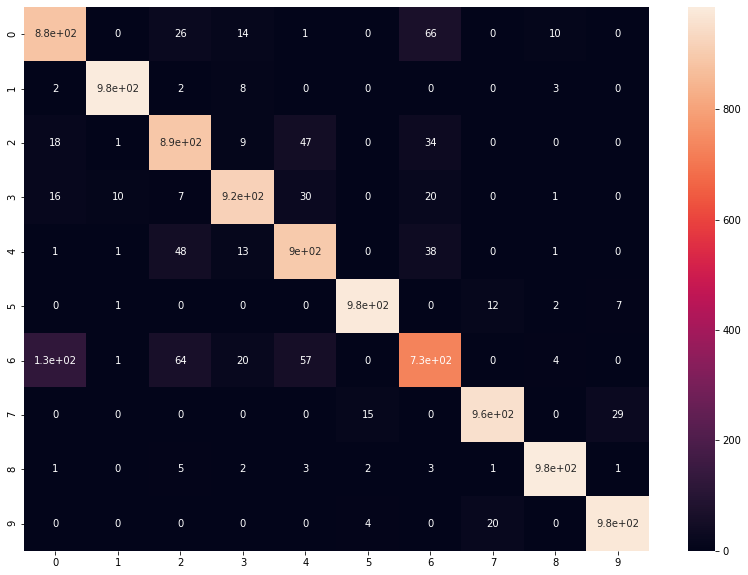

In [73]:
cm_1 = confusion_matrix(y_test, pred_classes_1)
plt.figure(figsize = (14,10))
sns.heatmap(cm_1, annot = True)

In [74]:
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, pred_classes_1, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.84      0.88      0.86      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.85      0.89      0.87      1000
     Class 3       0.93      0.92      0.92      1000
     Class 4       0.87      0.90      0.88      1000
     Class 5       0.98      0.98      0.98      1000
     Class 6       0.82      0.73      0.77      1000
     Class 7       0.97      0.96      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.96      0.98      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

